<a href="https://colab.research.google.com/github/bhattif/WF-classification/blob/master/Digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

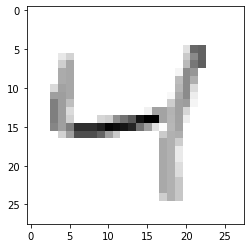

In [24]:
# Ref https://www.youtube.com/watch?v=wQ8BIBpya2k

import tensorflow as tf
import matplotlib.pyplot as plt

#tf.__version__ # shows version of tensorflow

mnist = tf.keras.datasets.mnist # 128 by 128 image of handwritten digits 0 to 9


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, 1)
plt.imshow(x_train[2], cmap=plt.cm.binary)
#print(x_train[2])
#print(y_train[2]) # shows groundtruth value



In [25]:
#Define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [26]:
# Training parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2614 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1076 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0731 - accuracy: 0.9772


In [28]:
# Evaluating the model
val_loss, val_acc = (model.evaluate(x_test, y_test))
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 45.7427 - accuracy: 0.9646
45.74268341064453 0.9646000266075134


In [30]:
# Saving Model
model.save('Digit_classification.model')
new_model = tf.keras.models.load_model('Digit_classification.model')

In [34]:
import numpy as np

predictions=new_model.predict([x_test]) # this takes list
print(np.argmax(predictions[21]))

313/313 [==============================] - 1s 2ms/step
6


<function matplotlib.pyplot.show(*args, **kw)>

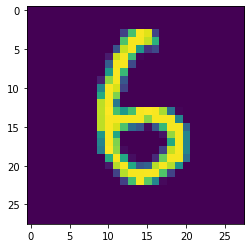

In [35]:
# to valide by seeing the groundtruth
plt.imshow(x_test[21])
plt.show